In [1]:
import torch
import numpy as np

import os
os.chdir('..')
from torch_geometric.loader import DataLoader
from gnn_library.util import train, save, load
from evaluate import evaluate_model, pp_output
import instance_generator as ig
import torch_converter as tc
import evaluate as ev
import osmnx as ox
from util import Dataset

%load_ext autoreload
%autoreload 2

In [2]:
device = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')
print("PyTorch has version {}".format(torch.__version__))
print('Using device:', device)

PyTorch has version 1.12.0+cu102
Using device: cuda:2


In [3]:
args = {
    'processor':         'GENConv',
    'head':              'classification',
    'num_layers':        2,
    'num_mlp_layers':    2,
    'aggr':              'max',
    'batch_size':        32,
    'node_feature_dim':  4,
    'edge_feature_dim':  1,
    'graph_feature_dim': 2,
    'hidden_dim':        64,
    'output_dim':        1,
    'dropout':           0.35,
    'epochs':            25,
    'opt':               'adam',
    'opt_scheduler':     'none',
    'opt_restart':       0,
    'weight_decay':      5e-3,
    'lr':                0.0001,
    'device':            device
}

train_num = 100; test_num = 30

er_config = {
    'graph_type': 'ER',
    'p': 1,
    'weighted': True
}
ba_config = {
    'graph_type': 'BA',
    'ba_param': 2,
    'weighted': True
}
geom_config = {
    'graph_type': 'GEOM',
    'threshold': 0.2,
    'scaling': 1 / np.sqrt(2)
}

rng = np.random.default_rng()


train_instances = [
        *ig.sample_instances(9, 7, train_num, rng, **er_config),
        *ig.sample_instances(9, 7, train_num, rng, **ba_config),
        *ig.sample_instances(9, 7, train_num, rng, **geom_config),
    ]

test_instances = [
        *ig.sample_instances(9, 7, test_num, rng, **er_config),
        *ig.sample_instances(9, 7, test_num, rng, **ba_config),
        *ig.sample_instances(9, 7, test_num, rng, **geom_config),
    ]


train_data = Dataset(tc._instances_to_train_samples(train_instances, args['head']))
test_data = Dataset(tc._instances_to_train_samples(test_instances, args['head']))

train_loader = DataLoader(
    train_data,
    batch_size=args['batch_size'],
    shuffle=True,
    num_workers=4
)

test_loader = DataLoader(
    test_data,
    batch_size=args['batch_size'],
    shuffle=True,
    num_workers=4
)

In [22]:
_, _, _, GNN, _ = train(train_loader, test_loader, args)

Training:   0%|          | 0/25 [00:00<?, ?Epochs/s]

TRAINING LOSS: 0.01974754671789238


Training:   4%|▍         | 1/25 [00:05<02:07,  5.32s/Epochs]

TEST LOSS: 0.019216042011976242
TEST ACCURACY: 0.6690962314605713


Training:   8%|▊         | 2/25 [00:09<01:41,  4.40s/Epochs]

TRAINING LOSS: 0.016766115439020745


Training:  12%|█▏        | 3/25 [00:12<01:30,  4.10s/Epochs]

TRAINING LOSS: 0.015403600976729404


Training:  16%|█▌        | 4/25 [00:16<01:23,  3.98s/Epochs]

TRAINING LOSS: 0.014297010324614653
TRAINING LOSS: 0.013444105430230686


Training:  20%|██        | 5/25 [00:21<01:29,  4.48s/Epochs]

TEST LOSS: 0.014365768060088158
TEST ACCURACY: 0.8046647310256958


Training:  24%|██▍       | 6/25 [00:25<01:20,  4.22s/Epochs]

TRAINING LOSS: 0.01242993551319737


Training:  28%|██▊       | 7/25 [00:29<01:12,  4.01s/Epochs]

TRAINING LOSS: 0.011851616429657893


Training:  32%|███▏      | 8/25 [00:32<01:06,  3.92s/Epochs]

TRAINING LOSS: 0.011492601849522721
TRAINING LOSS: 0.011004613104993103


Training:  36%|███▌      | 9/25 [00:38<01:09,  4.35s/Epochs]

TEST LOSS: 0.011905299499630928
TEST ACCURACY: 0.8294460773468018


Training:  40%|████      | 10/25 [00:41<01:01,  4.12s/Epochs]

TRAINING LOSS: 0.010434555077756726


Training:  44%|████▍     | 11/25 [00:45<00:56,  4.00s/Epochs]

TRAINING LOSS: 0.010267051845956747


Training:  48%|████▊     | 12/25 [00:49<00:50,  3.91s/Epochs]

TRAINING LOSS: 0.009947792381280528
TRAINING LOSS: 0.009821732779791367


Training:  52%|█████▏    | 13/25 [00:54<00:51,  4.33s/Epochs]

TEST LOSS: 0.011123799718916416
TEST ACCURACY: 0.8411079049110413


Training:  56%|█████▌    | 14/25 [00:58<00:46,  4.22s/Epochs]

TRAINING LOSS: 0.009421303921535243


Training:  60%|██████    | 15/25 [01:02<00:40,  4.10s/Epochs]

TRAINING LOSS: 0.009746951779899994


Training:  64%|██████▍   | 16/25 [01:06<00:35,  3.98s/Epochs]

TRAINING LOSS: 0.009514076928069654
TRAINING LOSS: 0.009451889169582716


Training:  68%|██████▊   | 17/25 [01:11<00:35,  4.40s/Epochs]

TEST LOSS: 0.012028572149574757
TEST ACCURACY: 0.8498542308807373


Training:  72%|███████▏  | 18/25 [01:15<00:29,  4.27s/Epochs]

TRAINING LOSS: 0.009501290512051402


Training:  76%|███████▌  | 19/25 [01:19<00:24,  4.12s/Epochs]

TRAINING LOSS: 0.009276325638971064


Training:  80%|████████  | 20/25 [01:22<00:20,  4.00s/Epochs]

TRAINING LOSS: 0.008958530908748152
TRAINING LOSS: 0.008964199850302643


Training:  84%|████████▍ | 21/25 [01:28<00:17,  4.37s/Epochs]

TEST LOSS: 0.011201689951121807
TEST ACCURACY: 0.8483965396881104


Training:  88%|████████▊ | 22/25 [01:32<00:12,  4.22s/Epochs]

TRAINING LOSS: 0.00906669064846427


Training:  92%|█████████▏| 23/25 [01:35<00:08,  4.11s/Epochs]

TRAINING LOSS: 0.009057630574667077


Training:  96%|█████████▌| 24/25 [01:39<00:04,  4.00s/Epochs]

TRAINING LOSS: 0.00928160682927225
TRAINING LOSS: 0.009828255511416972


Training: 100%|██████████| 25/25 [01:44<00:00,  4.20s/Epochs]

TEST LOSS: 0.010520988143980503
TEST ACCURACY: 0.8367347121238708


In [5]:
# save(GNN, args, 'GNN3')

In [4]:
GNN, args = load('GNN1', device)

In [29]:
from gnn_library.OBM_greedy import OBM_Greedy
from gnn_library.OBM_threshold_greedy import OBM_Threshold_Greedy

thresholds = np.linspace(0, 1, 101)
thresholded_greedy_models = [(threshold, OBM_Threshold_Greedy(threshold)) for threshold in thresholds]

seed = np.random.randint(0, 500000)
(m, n) = (8, 16)
config = er_config

rng = np.random.default_rng(seed)
eval_instances = ig.sample_instances(m, n, 10, rng, **config)

ratios2 = evaluate_model(
    meta_model=None,
    meta_model_type=None,
    base_models=[GNN],
    instances=eval_instances,
    batch_size=50,
    rng=rng,
    num_realizations=5
)

greedy_ratios = {}
for threshold, model in thresholded_greedy_models: 
    ratio = evaluate_model(
        meta_model=None,
        meta_model_type=None,
        base_models=[model],
        instances=eval_instances,
        batch_size=50,
        rng=rng,
        num_realizations=5
    )
    greedy_ratios[threshold] = np.mean(ratio[0])
pp_output(ratios2, _, show_log=False)
print(greedy_ratios)

-- Competitive ratios --
GNN: 0.9636
Greedy: 0.9885
{0.0: 0.9898615618042509, 0.01: 0.9907709910901383, 0.02: 0.9887539926092364, 0.03: 0.9891676274354246, 0.04: 0.9898586878263498, 0.05: 0.990938270845992, 0.06: 0.9904176017204994, 0.07: 0.9899765849853635, 0.08: 0.9880349758723668, 0.09: 0.9879952614274231, 0.1: 0.989681245203079, 0.11: 0.9886036346015852, 0.12: 0.9871217923277287, 0.13: 0.9863221537454058, 0.14: 0.9888654934960949, 0.15: 0.9879433296107477, 0.16: 0.9875422404926317, 0.17: 0.9880758650369629, 0.18: 0.9880700809976964, 0.19: 0.9879087193599798, 0.2: 0.9874323341644633, 0.21: 0.9893074144673001, 0.22: 0.9890345277309092, 0.23: 0.9898226249117947, 0.24: 0.987906312586011, 0.25: 0.9886948340759419, 0.26: 0.9902531917477507, 0.27: 0.9893946399312814, 0.28: 0.9889402699855628, 0.29: 0.9884096584256516, 0.3: 0.9877675846833188, 0.31: 0.9889775818624698, 0.32: 0.9886088165977333, 0.33: 0.9910454797711672, 0.34: 0.989234042940331, 0.35000000000000003: 0.9882749581778839, 0.36

In [30]:
max_threshold = max(greedy_ratios, key = greedy_ratios.get)
print(max_threshold, greedy_ratios[max_threshold])

0.33 0.9910454797711672


# Pivot to feature-generated graphs

In [4]:
def get_location_graph(city):
	location_graph = ox.graph_from_place(city, network_type="drive")
	location_graph = ox.speed.add_edge_speeds(location_graph)
	location_graph = ox.speed.add_edge_travel_times(location_graph)
	return {'location_graph': location_graph, 'city': city}

In [8]:
piedmont = get_location_graph("Piedmont, California, USA")
# san_francisco = get_location_graph("San Francisco, California, USA")
founex = get_location_graph("Founex, Switzerland")
carmel = get_location_graph("Carmel, Indiana, USA")
geneva = get_location_graph("Geneva, Switzerland")

In [23]:
#TODO PUT BACK TO REGRESSION
#!!!!!!!!!!!!!!!!!!!!!!!!!!!
args = {
    'processor':         'GENConv',
    'head':              'classification',
    'num_layers':        2,
    'num_mlp_layers':    2,
    'aggr':              'max',
    'batch_size':        32,
    'node_feature_dim':  4,
    'edge_feature_dim':  1,
    'graph_feature_dim': 2,
    'hidden_dim':        64,
    'output_dim':        1,
    'dropout':           0.35,
    'epochs':            25,
    'opt':               'adam',
    'opt_scheduler':     'none',
    'opt_restart':       0,
    'weight_decay':      5e-3,
    'lr':                0.0001,
    'device':            device
}

train_num = 100; test_num = 30

er_config = {
    'graph_type': 'ER',
    'p': 0.75,
    'weighted': True
}
ba_config = {
    'graph_type': 'BA',
    'ba_param': 2,
    'weighted': True
}
feat_config = {
    'graph_type': 'FEAT',
    'q': 0.85,
    'weighted': True
}
# osmnx_config = {
#     'graph_type': 'OSMNX',
#     'location_graph': piedmont['location_graph']
# }
# osmnx_config_2 = {
#     'graph_type': 'OSMNX',
#     'location_graph': san_francisco['location_graph']
# }

# ox.plot_graph(piedmont['location_graph'])
# ox.plot_graph(san_francisco['location_graph'])

# part_config = {
# 	'graph_type': 'PART',
#     'p': 0.5,
#     'size': 4,
#     'eps': 0.1
# },
# part_config = {
# 	'graph_type': 'PART',
#     'p': 0.5,
#     'size': 3,
#     'eps': 0.3
# }

rng = np.random.default_rng()


train_instances = [
        *ig.sample_instances(8, 8, train_num, rng, **er_config),
        *ig.sample_instances(8, 8, train_num, rng, **ba_config),
        *ig.sample_instances(8, 8, train_num, rng, **feat_config),
        # *ig.sample_instances(8, 8, train_num, rng, **osmnx_config),
        # *ig.sample_instances(8, 8, train_num, rng, **osmnx_config_2),
        # *ig.sample_instances(8, 8, train_num, rng, **feat_config),
        # *ig.sample_instances(8, 8, train_num, rng, **part_config),
    ]

test_instances = [
        *ig.sample_instances(8, 8, test_num, rng, **er_config),
        *ig.sample_instances(8, 8, test_num, rng, **ba_config),
        *ig.sample_instances(8, 8, train_num, rng, **feat_config),
        # *ig.sample_instances(8, 8, train_num, rng, **osmnx_config),
        # *ig.sample_instances(8, 8, train_num, rng, **osmnx_config_2),
        # *ig.sample_instances(8, 8, train_num, rng, **feat_config),
        # *ig.sample_instances(8, 8, train_num, rng, **part_config),
    ]


train_data = Dataset(tc._instances_to_train_samples(train_instances, args['head']))
test_data = Dataset(tc._instances_to_train_samples(test_instances, args['head']))

train_loader = DataLoader(
    train_data,
    batch_size=args['batch_size'],
    shuffle=True,
    num_workers=4
)

test_loader = DataLoader(
    test_data,
    batch_size=args['batch_size'],
    shuffle=True,
    num_workers=4
)

In [24]:
_, _, _, GNN, _ = train(train_loader, test_loader, args)

Training:   0%|          | 0/25 [00:00<?, ?Epochs/s]

TRAINING LOSS: 0.020642001289043494


Training:   4%|▍         | 1/25 [00:05<02:18,  5.78s/Epochs]

TEST LOSS: 0.019357942044734955
TEST ACCURACY: 0.8599487543106079


Training:   8%|▊         | 2/25 [00:09<01:42,  4.45s/Epochs]

TRAINING LOSS: 0.017774371684883997


Training:  12%|█▏        | 3/25 [00:13<01:31,  4.14s/Epochs]

TRAINING LOSS: 0.015357578280482361


Training:  16%|█▌        | 4/25 [00:16<01:22,  3.91s/Epochs]

TRAINING LOSS: 0.0129076544088211
TRAINING LOSS: 0.011382545043024227


Training:  20%|██        | 5/25 [00:21<01:28,  4.40s/Epochs]

TEST LOSS: 0.0115871112793684
TEST ACCURACY: 0.8915456533432007


Training:  24%|██▍       | 6/25 [00:25<01:18,  4.16s/Epochs]

TRAINING LOSS: 0.010645781027273737


Training:  28%|██▊       | 7/25 [00:29<01:10,  3.94s/Epochs]

TRAINING LOSS: 0.010033973720487503


Training:  32%|███▏      | 8/25 [00:32<01:04,  3.79s/Epochs]

TRAINING LOSS: 0.009714699899710768
TRAINING LOSS: 0.009417899200866976


Training:  36%|███▌      | 9/25 [00:38<01:10,  4.41s/Epochs]

TEST LOSS: 0.010463403537869453
TEST ACCURACY: 0.8881297707557678


Training:  40%|████      | 10/25 [00:41<01:02,  4.15s/Epochs]

TRAINING LOSS: 0.009350781248574205


Training:  44%|████▍     | 11/25 [00:45<00:55,  3.94s/Epochs]

TRAINING LOSS: 0.009060964055305763


Training:  48%|████▊     | 12/25 [00:48<00:49,  3.85s/Epochs]

TRAINING LOSS: 0.009048979381005542
TRAINING LOSS: 0.008743844671751098


Training:  52%|█████▏    | 13/25 [00:54<00:51,  4.25s/Epochs]

TEST LOSS: 0.009637508541345596
TEST ACCURACY: 0.8906916975975037


Training:  56%|█████▌    | 14/25 [00:57<00:44,  4.01s/Epochs]

TRAINING LOSS: 0.008638104122373268


Training:  60%|██████    | 15/25 [01:01<00:38,  3.88s/Epochs]

TRAINING LOSS: 0.008647749274165081


Training:  64%|██████▍   | 16/25 [01:04<00:34,  3.80s/Epochs]

TRAINING LOSS: 0.008479175553154602
TRAINING LOSS: 0.00842705186751249


Training:  68%|██████▊   | 17/25 [01:10<00:34,  4.31s/Epochs]

TEST LOSS: 0.009887469932436943
TEST ACCURACY: 0.8915456533432007


Training:  72%|███████▏  | 18/25 [01:14<00:29,  4.16s/Epochs]

TRAINING LOSS: 0.00846248067808237


Training:  76%|███████▌  | 19/25 [01:17<00:23,  3.98s/Epochs]

TRAINING LOSS: 0.0083745697030811


Training:  80%|████████  | 20/25 [01:21<00:19,  3.88s/Epochs]

TRAINING LOSS: 0.008307144722546176
TRAINING LOSS: 0.008414111408344704


Training:  84%|████████▍ | 21/25 [01:26<00:17,  4.35s/Epochs]

TEST LOSS: 0.010923147201538086
TEST ACCURACY: 0.8966695070266724


Training:  88%|████████▊ | 22/25 [01:30<00:12,  4.12s/Epochs]

TRAINING LOSS: 0.008305579638309616


Training:  92%|█████████▏| 23/25 [01:33<00:07,  3.94s/Epochs]

TRAINING LOSS: 0.00833673094459575


Training:  96%|█████████▌| 24/25 [01:37<00:03,  3.84s/Epochs]

TRAINING LOSS: 0.00820704312365261
TRAINING LOSS: 0.008298972427255387


Training: 100%|██████████| 25/25 [01:42<00:00,  4.11s/Epochs]

TEST LOSS: 0.009027923457324505
TEST ACCURACY: 0.8966695070266724


## Set up the threshold greedy value
The instance set used to determine the threshold should be the same as the training set for the base models. Here we reduce the number of instances to make the evaluation faster.

For the moment, the instance set is the evaluation set since they are too different and would disadvantage threshold greedy.

In [32]:
from gnn_library.OBM_threshold_greedy import OBM_Threshold_Greedy
from tqdm import tqdm
seed = np.random.randint(0, 500000)
rng = np.random.default_rng(seed)


thresholds = np.linspace(0, 1, 101)
thresholds = np.linspace(0, 1, 2) # TODO remove
#TODO max value in threshold should be max value observable in graphs (is not the case for osmnx graphs for the moment)
thresholded_greedy_models = {threshold: OBM_Threshold_Greedy(threshold) for threshold in thresholds}

osmnx_config1 = {
    'graph_type': 'OSMNX',
    'location_graph': piedmont['location_graph']
}
osmnx_config2 = {
    'graph_type': 'OSMNX',
    'location_graph': geneva['location_graph']
}
osmnx_config3 = {
    'graph_type': 'OSMNX',
    'location_graph': carmel['location_graph']
}

train_num = 10
train_instances = [
        *ig.sample_instances(8, 8, train_num, rng, **osmnx_config1),
        *ig.sample_instances(8, 8, train_num, rng, **osmnx_config2),
        *ig.sample_instances(8, 8, train_num, rng, **osmnx_config3),
]

# train_instances = [
#         *ig.sample_instances(8, 8, train_num, rng, **er_config),
#         *ig.sample_instances(8, 8, train_num, rng, **ba_config),
#         *ig.sample_instances(8, 8, train_num, rng, **feat_config),
#         *ig.sample_instances(8, 8, train_num, rng, **osmnx_config),
# ]


greedy_ratios = {}
for threshold, model in tqdm(thresholded_greedy_models.items()): 
    rng = np.random.default_rng(seed)
    ratio = ev.evaluate_model(
        meta_model=None,
        meta_model_type=None,
        base_models=[model],
        instances=train_instances,
        batch_size=50,
        rng=rng,
        num_realizations=5
    )
    greedy_ratios[threshold] = np.mean(ratio[0])
    

max_threshold = max(greedy_ratios, key = greedy_ratios.get)
print(f"Best threshold value: {max_threshold} achieves CR: {greedy_ratios[max_threshold]}")
THRESHOLD_MODEL = thresholded_greedy_models[max_threshold]

NameError: name 'piedmont' is not defined

In [26]:
print(greedy_ratios)

{0.0: 0.9146754475262843, 1.0: 0.8810199370175859}


## Evaluation

In [23]:
seed = np.random.randint(0, 500000)
(m, n) = (32, 16)
# config = {
#     'graph_type': 'FEAT',
#     'q': 0.85,
#     'weighted': True
# }
# config = {
#     'graph_type': 'OSMNX',
#     'location_graph': piedmont['location_graph']
# }
# config = {
# 	'graph_type': 'PART',
#     'p': 0.5,
#     'size': 4,
#     'eps': 0.1
# }

rng = np.random.default_rng(seed)
# eval_instances = ig.sample_instances(m, n, 100, rng, **config)
eval_num = 25
eval_instances = [
        *ig.sample_instances(m, n, eval_num, rng, **er_config),
        *ig.sample_instances(m, n, eval_num, rng, **ba_config),
        *ig.sample_instances(m, n, eval_num, rng, **feat_config),
        *ig.sample_instances(m, n, eval_num, rng, **osmnx_config),
]

ratios = ev.evaluate_model(
    meta_model=None,
    meta_model_type=None,
    base_models=[GNN],
    instances=eval_instances,
    batch_size=50,
    rng=rng,
    num_realizations=5
)


ratios2 = ev.evaluate_model(
    meta_model=None,
    meta_model_type=None,
    base_models=[THRESHOLD_MODEL],
    instances=eval_instances,
    batch_size=50,
    rng=rng,
    num_realizations=5
)

pp_output(ratios, _, show_log=False)
print(f"Thresholded greedy: {np.mean(ratios2[0]).round(4)}")


-- Competitive ratios --
GNN: 0.8371
Greedy: 0.8441
LP-rounding: 0.9389
Thresholded greedy: 0.8402


In [27]:
num_trials = 40
node_configs = [(x, 16) for x in np.arange(4, 64, 8)]
# of nodes [20 -> 80]
# of nodes in batch [10,000 -> 40,000]
batch_size = 500 #[int(min(32, x + y)) for (x, y) in node_configs]
graph_configs = [
    # {
    #     'graph_type': 'GM'
    # },
    # {
    #     'graph_type': 'ER',
    #     'p': 0.75,
    #     'weighted': False
    # },
    # {
    #     'graph_type': 'BA',
    #     'ba_param': 4,
    #     'weighted': False
    # },
    {
        'graph_type': 'FEAT',
        'q': 0.75,
        'weighted': True
    },
    # {
    #     'graph_type': 'FEAT',
    #     'q': 0.9,
    #     'weighted': True
    # },
    # {
    #     'graph_type': 'FEAT',
    #     'q': 0.95,
    #     'weighted': True
    # },

    # {
    #     'graph_type': 'PART',
    #     'p': 0.5,
    #     'size': 4,
    #     'eps': 0.1
    # },
    # {
    #     'graph_type': 'PART',
    #     'p': 0.5,
    #     'size': 3,
    #     'eps': 0.3
    # }
]

ratios = [x/y for (x,y) in node_configs]
print(ratios)

data = {config['q']: [] for config in graph_configs}
for graph_config in graph_configs:
    for i, node_config in enumerate(node_configs):
        print(graph_config, node_config)
        seed = np.random.randint(0, 500000)
        rng = np.random.default_rng(seed)
        instances = ig.sample_instances(*node_config, num_trials, rng, **graph_config)


        rng = np.random.default_rng(seed)
        gnn_learned_ratios, greedy_ratios, lp_match_ratios = evaluate_model(
            meta_model=None,
            meta_model_type=None,
            base_models=[GNN],
            instances=instances,
            batch_size=batch_size,
            rng=rng,
            num_realizations=5
        )
        ratios = evaluate_model(
            meta_model=None,
            meta_model_type=None,
            base_models=[GNN],
            instances=instances,
            batch_size=batch_size,
            rng=rng,
            num_realizations=5
        )


        data[graph_config['q']].append(np.array(
            [
                gnn_learned_ratios,
                greedy_ratios,
                lp_match_ratios
            ]
        ))

[0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75]
{'graph_type': 'FEAT', 'q': 0.75, 'weighted': True} (4, 16)


{'graph_type': 'FEAT', 'q': 0.75, 'weighted': True} (12, 16)
{'graph_type': 'FEAT', 'q': 0.75, 'weighted': True} (20, 16)
{'graph_type': 'FEAT', 'q': 0.75, 'weighted': True} (28, 16)
{'graph_type': 'FEAT', 'q': 0.75, 'weighted': True} (36, 16)
{'graph_type': 'FEAT', 'q': 0.75, 'weighted': True} (44, 16)
{'graph_type': 'FEAT', 'q': 0.75, 'weighted': True} (52, 16)
{'graph_type': 'FEAT', 'q': 0.75, 'weighted': True} (60, 16)


In [33]:
num_trials = 30
node_configs = [(x, 16) for x in np.arange(4, 64, 8)]
# of nodes [20 -> 80]
# of nodes in batch [10,000 -> 40,000]
batch_size = 500 #[int(min(32, x + y)) for (x, y) in node_configs]




graph_configs = [
    # {
    # 'graph_type': 'FEAT',
    # 'q': 0.5
    # },
    {
        'graph_type': 'OSMNX',
        'location_graph': piedmont['location_graph'],
        'city': piedmont['city']
    },
    # {
    #     'graph_type': 'OSMNX',
    #     'location_graph': carmel['location_graph'],
    #     'city': carmel['city']
    # },
    # {
    #     'graph_type': 'OSMNX',
    #     'location_graph': geneva['location_graph'],
    #     'city': geneva['city']
    # },
    # {
    #     'graph_type': 'OSMNX',
    #     'location_graph': founex['location_graph'],
    #     'city': founex['city']
    # },
    # {
    # 'graph_type': 'FEAT',
    # 'q': 0.75,
    # 'weighted': True
    # },
    # {
    # 'graph_type': 'FEAT',
    # 'q': 0.9,
    # 'weighted': True
    # },
    # {
    # 'graph_type': 'FEAT',
    # 'q': 0.95,
    # 'weighted': True
    # },
    # {
    # 'graph_type': 'FEAT',
    # 'q': 0.99
    # }
    # {
    #     'graph_type': 'PART',
    #     'p': 0.5,
    #     'size': 4,
    #     'eps': 0.1
    # },
    # {
    #     'graph_type': 'PART',
    #     'p': 0.5,
    #     'size': 3,
    #     'eps': 0.3
    # }
]

ratios = [x/y for (x,y) in node_configs]
print(ratios)

data = {config['city']: [] for config in graph_configs}
for graph_config in graph_configs:
    for i, node_config in enumerate(node_configs):
        print(node_config, graph_config)
        seed = np.random.randint(0, 500000)
        rng = np.random.default_rng(seed)
        instances = ig.sample_instances(*node_config, num_trials, rng, **graph_config)


        rng = np.random.default_rng(seed)
        gnn_learned_ratios, greedy_ratios, lp_match_ratios = evaluate_model(
            meta_model=None,
            meta_model_type=None,
            base_models=[GNN],
            instances=instances,
            batch_size=batch_size,
            rng=rng,
            num_realizations=5
        )
        thresholded_greedy_ratios = [0]

        # thresholded_greedy_ratios, greedy_ratios, lp_match_ratios = evaluate_model(
        #     meta_model=None,
        #     meta_model_type=None,
        #     base_models=[THRESHOLD_MODEL],
        #     instances=instances,
        #     batch_size=batch_size,
        #     rng=rng,
        #     num_realizations=5
        # )

        data[graph_config['city']].append(np.array(
            [
                gnn_learned_ratios,
                thresholded_greedy_ratios,
                greedy_ratios,
                lp_match_ratios
            ]
        ))

[0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75]
(4, 16) {'graph_type': 'OSMNX', 'location_graph': <networkx.classes.multidigraph.MultiDiGraph object at 0x7fdec395be80>, 'city': 'Piedmont, California, USA'}


/tmp/ipykernel_2158288/946936367.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data[graph_config['city']].append(np.array(


(12, 16) {'graph_type': 'OSMNX', 'location_graph': <networkx.classes.multidigraph.MultiDiGraph object at 0x7fdec395be80>, 'city': 'Piedmont, California, USA'}
(20, 16) {'graph_type': 'OSMNX', 'location_graph': <networkx.classes.multidigraph.MultiDiGraph object at 0x7fdec395be80>, 'city': 'Piedmont, California, USA'}
(28, 16) {'graph_type': 'OSMNX', 'location_graph': <networkx.classes.multidigraph.MultiDiGraph object at 0x7fdec395be80>, 'city': 'Piedmont, California, USA'}
(36, 16) {'graph_type': 'OSMNX', 'location_graph': <networkx.classes.multidigraph.MultiDiGraph object at 0x7fdec395be80>, 'city': 'Piedmont, California, USA'}
(44, 16) {'graph_type': 'OSMNX', 'location_graph': <networkx.classes.multidigraph.MultiDiGraph object at 0x7fdec395be80>, 'city': 'Piedmont, California, USA'}
(52, 16) {'graph_type': 'OSMNX', 'location_graph': <networkx.classes.multidigraph.MultiDiGraph object at 0x7fdec395be80>, 'city': 'Piedmont, California, USA'}
(60, 16) {'graph_type': 'OSMNX', 'location_gra

[0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75]


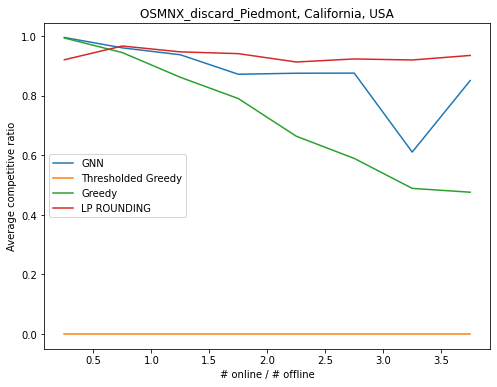

In [34]:
import matplotlib.pyplot as plt
ratios = [x/y for (x,y) in node_configs]
print(ratios)
for city, comp_ratios in data.items():
    greedy_avg_ratios = []
    thresholded_greedy_avg_ratios = []
    gnn_avg_ratios = []
    lp_match_avg_ratios = []


    for trial_ratios in comp_ratios:
        gnn_avg_ratios.append(np.array(trial_ratios[0]).mean())
        thresholded_greedy_avg_ratios.append(np.array(trial_ratios[1]).mean())
        greedy_avg_ratios.append(np.array(trial_ratios[2]).mean())
        lp_match_avg_ratios.append(np.array(trial_ratios[3]).mean())
        

    title = f"OSMNX_discard_{city}"
    fig = plt.figure(figsize=(8,6))
    plt.title(title)
    plt.plot(ratios, gnn_avg_ratios, label='GNN')
    plt.plot(ratios, thresholded_greedy_avg_ratios, label='Thresholded Greedy')
    plt.plot(ratios, greedy_avg_ratios, label='Greedy')
    plt.plot(ratios, lp_match_avg_ratios, label='LP ROUNDING')
    plt.xlabel('# online / # offline')
    plt.ylabel('Average competitive ratio')
    plt.legend()
    plt.savefig(f"data/{title}.png")
    plt.show()



FEAT_only_ratings_0.75


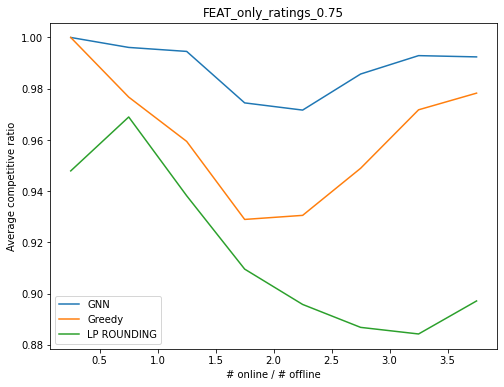

In [28]:
import matplotlib.pyplot as plt
ratios = [x/y for (x,y) in node_configs]
for q, comp_ratios in data.items():
    greedy_avg_ratios = []
    gnn_avg_ratios = []
    lp_match_avg_ratios = []


    for trial_ratios in comp_ratios:
        gnn_avg_ratios.append(np.array(trial_ratios[0]).mean())
        greedy_avg_ratios.append(np.array(trial_ratios[1]).mean())
        lp_match_avg_ratios.append(np.array(trial_ratios[2]).mean())

    # title = f"PART_size_{size}"
    title = f"FEAT_only_ratings_{q}"
    print(title)
    fig = plt.figure(figsize=(8,6))
    plt.title(title)
    plt.plot(ratios, gnn_avg_ratios, label='GNN')
    plt.plot(ratios, greedy_avg_ratios, label='Greedy')
    plt.plot(ratios, lp_match_avg_ratios, label='LP ROUNDING')
    plt.xlabel('# online / # offline')
    plt.ylabel('Average competitive ratio')
    plt.legend()
    # plt.savefig(f"data/{title}.png")
    plt.show()


## Graph transferability

In [25]:
num_trials = 40
node_configs = [(x, x) for x in np.arange(4, 40, 4)]
batch_size = 500 #[int(min(32, x + y)) for (x, y) in node_configs]


graph_configs = [
    {
    'graph_type': 'FEAT',
    'q': 0.75,
    'weighted': True
    },
]

sizes = [x for (x,_) in node_configs]
print(sizes)

data = {config['q']: [] for config in graph_configs}
for graph_config in graph_configs:
    for i, node_config in enumerate(node_configs):
        print(node_config, graph_config)
        seed = np.random.randint(0, 500000)
        rng = np.random.default_rng(seed)
        instances = ig.sample_instances(*node_config, num_trials, rng, **graph_config)


        rng = np.random.default_rng(seed)

        cr_ratios = evaluate_model(
            meta_model=None,
            meta_model_type=None,
            base_models=[GNN],
            instances=instances,
            batch_size=batch_size,
            rng=rng,
            num_realizations=5,
            baselines=['greedy', 'lp_rounding']
        )

        thresholded_greedy_ratios = [0]

        data[graph_config['q']].append(cr_ratios)

[4, 8, 12, 16, 20, 24, 28, 32, 36]
(4, 4) {'graph_type': 'FEAT', 'q': 0.75, 'weighted': True}
Set parameter TokenServer to value "soal-nas.stanford.edu"
(8, 8) {'graph_type': 'FEAT', 'q': 0.75, 'weighted': True}
(12, 12) {'graph_type': 'FEAT', 'q': 0.75, 'weighted': True}
(16, 16) {'graph_type': 'FEAT', 'q': 0.75, 'weighted': True}
(20, 20) {'graph_type': 'FEAT', 'q': 0.75, 'weighted': True}
(24, 24) {'graph_type': 'FEAT', 'q': 0.75, 'weighted': True}
(28, 28) {'graph_type': 'FEAT', 'q': 0.75, 'weighted': True}
(32, 32) {'graph_type': 'FEAT', 'q': 0.75, 'weighted': True}
(36, 36) {'graph_type': 'FEAT', 'q': 0.75, 'weighted': True}


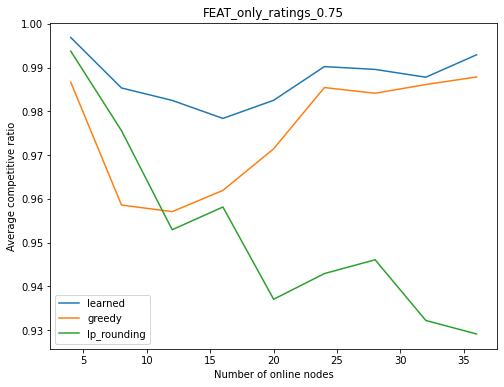

In [26]:
import matplotlib.pyplot as plt

sizes = [x for (x,_) in node_configs]

aggregated_ratios = {}
for q, comp_ratios in data.items():
    for trial_ratios in comp_ratios:
        for model, ratio_values in trial_ratios.items():
            current_ratios = aggregated_ratios.get(model, [])
            current_ratios.append(np.array(ratio_values).mean())
            aggregated_ratios[model] = current_ratios

fig = plt.figure(figsize=(8,6))
for model, ratios in aggregated_ratios.items():
    plt.plot(sizes, ratios, label=model)

title = f"FEAT_only_ratings_{q}"
plt.title(title)
plt.xlabel('Number of online nodes')
plt.ylabel('Average competitive ratio')
plt.legend()
# plt.savefig(f"data/{title}.png")
plt.show()
